## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_theme()
import tensorflow as tf

## Reading the Dataset

In [2]:
df = pd.read_csv("C:\\Users\\Nagasai\\Downloads\\Real estate.csv")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

C:\Users\Nagasai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

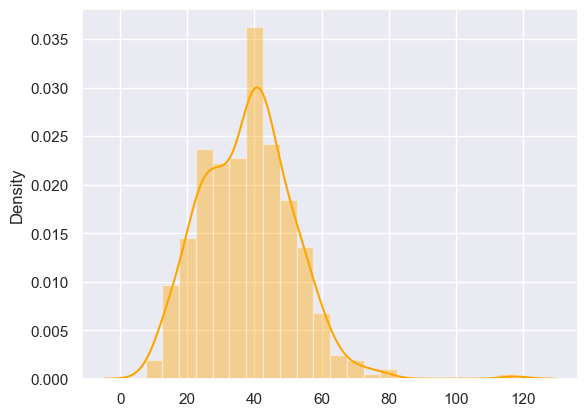

In [5]:
sns.distplot(x=df['Y house price of unit area'],color='orange')

<AxesSubplot:xlabel='X2 house age'>

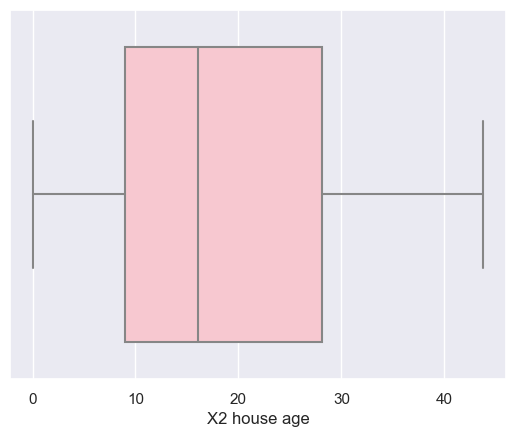

In [6]:
sns.boxplot(x='X2 house age',data=df,color='pink')

<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Count'>

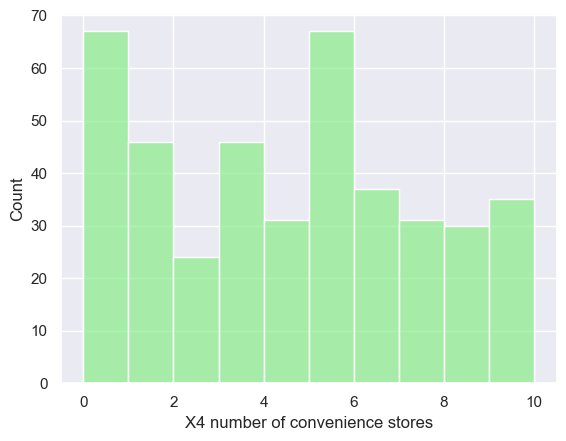

In [7]:
sns.histplot(x='X4 number of convenience stores',data=df,color='lightgreen')

## Dividiing dependent and independent variables

In [8]:
X = df.iloc[:,2:-1].values
y = df.iloc[:,-1].values

In [9]:
X

array([[ 32.     ,  84.87882,  10.     ,  24.98298, 121.54024],
       [ 19.5    , 306.5947 ,   9.     ,  24.98034, 121.53951],
       [ 13.3    , 561.9845 ,   5.     ,  24.98746, 121.54391],
       ...,
       [ 18.8    , 390.9696 ,   7.     ,  24.97923, 121.53986],
       [  8.1    , 104.8101 ,   5.     ,  24.96674, 121.54067],
       [  6.5    ,  90.45606,   9.     ,  24.97433, 121.5431 ]])

In [10]:
y

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

## Splitting train and test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.2, random_state = 1)

In [12]:
X_test

array([[1.0400000e+01, 2.2519380e+03, 4.0000000e+00, 2.4959570e+01,
        1.2151353e+02],
       [1.1000000e+00, 1.9358450e+02, 6.0000000e+00, 2.4965710e+01,
        1.2154089e+02],
       [8.9000000e+00, 3.0781760e+03, 0.0000000e+00, 2.4954640e+01,
        1.2156627e+02],
       [1.6000000e+01, 4.0665870e+03, 0.0000000e+00, 2.4942970e+01,
        1.2150342e+02],
       [0.0000000e+00, 2.7401440e+02, 1.0000000e+00, 2.4974800e+01,
        1.2153059e+02],
       [1.4700000e+01, 1.7171930e+03, 2.0000000e+00, 2.4964470e+01,
        1.2151649e+02],
       [1.8200000e+01, 2.1795900e+03, 3.0000000e+00, 2.4962990e+01,
        1.2151252e+02],
       [1.3100000e+01, 1.1648380e+03, 4.0000000e+00, 2.4991560e+01,
        1.2153406e+02],
       [1.7700000e+01, 3.5085150e+02, 1.0000000e+00, 2.4975440e+01,
        1.2153119e+02],
       [3.0300000e+01, 4.5103590e+03, 1.0000000e+00, 2.4949250e+01,
        1.2149542e+02],
       [2.7100000e+01, 4.4127650e+03, 1.0000000e+00, 2.4950320e+01,
        1.21

In [13]:
X_test

array([[1.0400000e+01, 2.2519380e+03, 4.0000000e+00, 2.4959570e+01,
        1.2151353e+02],
       [1.1000000e+00, 1.9358450e+02, 6.0000000e+00, 2.4965710e+01,
        1.2154089e+02],
       [8.9000000e+00, 3.0781760e+03, 0.0000000e+00, 2.4954640e+01,
        1.2156627e+02],
       [1.6000000e+01, 4.0665870e+03, 0.0000000e+00, 2.4942970e+01,
        1.2150342e+02],
       [0.0000000e+00, 2.7401440e+02, 1.0000000e+00, 2.4974800e+01,
        1.2153059e+02],
       [1.4700000e+01, 1.7171930e+03, 2.0000000e+00, 2.4964470e+01,
        1.2151649e+02],
       [1.8200000e+01, 2.1795900e+03, 3.0000000e+00, 2.4962990e+01,
        1.2151252e+02],
       [1.3100000e+01, 1.1648380e+03, 4.0000000e+00, 2.4991560e+01,
        1.2153406e+02],
       [1.7700000e+01, 3.5085150e+02, 1.0000000e+00, 2.4975440e+01,
        1.2153119e+02],
       [3.0300000e+01, 4.5103590e+03, 1.0000000e+00, 2.4949250e+01,
        1.2149542e+02],
       [2.7100000e+01, 4.4127650e+03, 1.0000000e+00, 2.4950320e+01,
        1.21

In [14]:
y_train

array([ 37.4,  51.8,  58.1,  49.5,  30.6,  48. ,  18.2,  27.7,  69.7,
        67.7,  26.6,  47.9,  42.2,  23.8,  40.5,  63.2,  55.2,  46.6,
        46.2,  24.4,  21.5,  43.1,  43.8,  55. ,  28.6,  35.1,  54.4,
        78. ,  58. ,  46.1, 117.5,  25.7,  48.1,  53.3,  42.3,  33.6,
        25.3,  42.5,  20. ,  40.6,  29.3,  33.1,  41. ,  26.5,  51. ,
        42. ,  37.4,  43.2,  58.8,  40.1,  41.6,  48.6,  42.4,  31.3,
        39.3,  36.7,  63.9,  23.5,  15.6,  22.8,  13.8,  51.7,  60.7,
        48. ,  30.7,  57.4,  63.3,  34.3,  45.2,  45.5,  43.5,  39.4,
        20.7,  23.1,  22.1,  30.7,  70.1,  48.2,  37.9,  71. ,  12.9,
        40.2,  31.3,  59. ,  47.7,  48.5,  46. ,  55.5,  43.4,  24.7,
        26.2,  31.3,  45.5,  45.9,  34.7,  57.8,  62.1,  19. ,  61.9,
        48.5,  40.5,  32.9,  46.6,  34.1,  24.7,  43.2,  35.5,  38.2,
        55.1,  44.3,  51.6,  36.5,  38.9,  20.8,  25.6,  20.7,  47.7,
        37.5,  39.4,  34.4,  53.9,  30.1,  40.6,  31.3,  34.1,  45.1,
        23.5,  26.5,

In [15]:
y_test

array([27.3, 54.4, 22. , 11.6, 45.4, 23. , 21.8, 32.2, 37.4, 22.6, 17.4,
       36.8, 23.1, 36.9, 56.3, 20.9, 43.5, 40.3, 27.7, 42.1, 46.6, 21.8,
       38.1, 53.7, 57.1, 26.6, 32.1, 56.8, 43.1, 16.7, 33.4, 34.2, 39.6,
       52.5, 47.1, 13. , 37.5, 32.5, 42.3, 20.5, 40.3, 16.1, 58.1, 33.4,
       30.8, 21.7, 20.9, 42.5, 38.1, 39.6, 18.6, 44.3, 39.7, 15.4, 50.8,
       36.3, 52.2, 37.8, 26.5, 42.5, 12.8, 32.9, 29.4, 19.2, 42.6, 32.4,
       42.7, 42.3, 15.9, 43.9, 44.5, 15.5, 29.8, 24.5, 50. , 37.2, 30.9,
       37. , 33.1, 59.6, 40.8, 52.2, 47.1])

## Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X

array([[ 32.     ,  84.87882,  10.     ,  24.98298, 121.54024],
       [ 19.5    , 306.5947 ,   9.     ,  24.98034, 121.53951],
       [ 13.3    , 561.9845 ,   5.     ,  24.98746, 121.54391],
       ...,
       [ 18.8    , 390.9696 ,   7.     ,  24.97923, 121.53986],
       [  8.1    , 104.8101 ,   5.     ,  24.96674, 121.54067],
       [  6.5    ,  90.45606,   9.     ,  24.97433, 121.5431 ]])

## Training Regression Models

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [19]:
models_table = pd.DataFrame(columns=['Model','Mean Squared Error','Cross Validation'])

In [20]:
regressors={
    'Linear Regressor':LinearRegression(),
    'Support Vector Regression': SVR(kernel='rbf'),
    'Decision Tree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor(n_estimators=10)
}
for model_name,model in regressors.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    models_table = models_table.append({'Model': model_name,
                         'Mean Squared Error': mean_squared_error(y_test, y_pred),
                        'R2 Score': r2_score(y_test, y_pred),
                        'Cross Validation' : cross_val_score(model,X,y,scoring = 'r2',cv = 15).mean()},
                         ignore_index=True)
display(models_table)

C:\Users\Nagasai\AppData\Local\Temp\ipykernel_14980\2006559944.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_table = models_table.append({'Model': model_name,
C:\Users\Nagasai\AppData\Local\Temp\ipykernel_14980\2006559944.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_table = models_table.append({'Model': model_name,
C:\Users\Nagasai\AppData\Local\Temp\ipykernel_14980\2006559944.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_table = models_table.append({'Model': model_name,
C:\Users\Nagasai\AppData\Local\Temp\ipykernel_14980\2006559944.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_ta

,Model,Mean Squared Error,Cross Validation,R2 Score
0,Linear Regressor,45.424791,0.563995,0.700731
1,Support Vector Regression,35.659295,0.529368,0.765069
2,Decision Tree,59.553486,0.449091,0.607648
3,RandomForest,74.727582,0.672136,0.507678


## Training with Neural Networks

In [40]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=32,activation='relu'))
ann.add(tf.keras.layers.Dense(units=20,activation='relu'))
ann.add(tf.keras.layers.Dense(units=16,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='relu'))

In [41]:
ann.compile(optimizer='adam',loss='mean_squared_error',metrics=['MeanSquaredError'])
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
11/11 [==============================] - 1s 4ms/step - loss: 1688.9399 - mean_squared_error: 1688.9399
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 1688.4969 - mean_squared_error: 1688.4969
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 1681.9058 - mean_squared_error: 1681.9058
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 1662.4896 - mean_squared_error: 1662.4896
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 1626.7483 - mean_squared_error: 1626.7483
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 1558.1731 - mean_squared_error: 1558.1731
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 1448.2521 - mean_squared_error: 1448.2521
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 1281.0109 - mean_squared_error: 1281.0109
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 1050.33

11/11 [==============================] - 0s 2ms/step - loss: 63.3745 - mean_squared_error: 63.3745
Epoch 74/100
11/11 [==============================] - 0s 2ms/step - loss: 63.2564 - mean_squared_error: 63.2564
Epoch 75/100
11/11 [==============================] - 0s 2ms/step - loss: 63.3074 - mean_squared_error: 63.3074
Epoch 76/100
11/11 [==============================] - 0s 2ms/step - loss: 63.0101 - mean_squared_error: 63.0101
Epoch 77/100
11/11 [==============================] - 0s 3ms/step - loss: 63.1071 - mean_squared_error: 63.1071
Epoch 78/100
11/11 [==============================] - 0s 3ms/step - loss: 63.2010 - mean_squared_error: 63.2010
Epoch 79/100
11/11 [==============================] - 0s 3ms/step - loss: 63.1919 - mean_squared_error: 63.1919
Epoch 80/100
11/11 [==============================] - 0s 3ms/step - loss: 62.9218 - mean_squared_error: 62.9218
Epoch 81/100
11/11 [==============================] - 0s 3ms/step - loss: 62.5302 - mean_squared_error: 62.5302
Epoch

In [42]:
y1_pred=ann.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [43]:
r2_score(y_test,y1_pred)

0.7123186838785414